<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v4:</b>

<b>Андрей, привет еще раз!</b>

Ты молодец, исправил все замечания. Критических замечаний нет.

Что еще могу рекомендовать:
* Для предобработки данных очень здорово использовать <a href="https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html">пайплайны</a>, в которые обычно добавляются шаги с масштабированием и кодированием признаков, заменой пропущенных значений и т.д. (если таковые имеются, конечно). Это делается для избежания даже малейшей утечки данных.
* Для интерпретации предсказаний моделей есть отличная библиотека <a href="https://habr.com/ru/articles/428213/">SHAP</a>.
* Для закрепления материала <a href='https://www.youtube.com/watch?v=wnTlsXaVj-s'>очень интересная лекция по градиентным бустингам</a> (крайне рекомендую).

На этом всё) Удачи в дальнейшем обучении!

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v3:</b>
    
<b>Привет, Андрей!</b>
     
Критические замечания которые необходимо исправить:
* Обучение кодировщщка делаем только на выборке train
* Тестируем одну модель
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v2:</b>
    
<b>Привет, Андрей!</b>
    
Молодец, что исправил часть замечаний.
    
Критические замечания которые необходимо исправить:
* аномалии года регистрации
* кодирование до разделения на выборки
* тестирование лучшей модели
* общий вывод
</div>

<b>Привет, Андрей!</b>

Меня зовут Евгений Лукашин, я буду проверять твой проект, постараемся вместе сделать его ещё лучше. Предлагаю обращаться к друг другу на «ты», если для тебя это будет комфортно. Иначе дай знать, и мы сразу перейдём на «вы».

Желательно отвечать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку' и т.д.) выделять их каким-либо цветом, например, так:


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Исправил.
</div>  


Пожалуйста, не удаляй мои комментарии, так как они повышают качество повторного ревью, и позволят мне быстрее проверить твой проект.

<br> 
Мои комментарии будут выглядеть так:

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b>
    
<b>✅«Отлично»:</b> Если все сделано правильно
</div>

<div class="alert alert-warning" role="alert">
<b>Комментарий ревьюера:</b>
    
<b>⚠️«Можно лучше»: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера:</b>
    
<b>⛔️«Надо исправить»:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

Помни, что у нас общая цель - подготовить тебя к успешной работе Data Science  специалистом!

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

## Подготовка данных

In [1]:
pip install feature-engine

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import copy

import time 

from sklearn.metrics import mean_squared_error as mse 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error

from catboost import CatBoostRegressor 
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

RND = 12345

In [4]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/autos.csv')

new_columns = df.columns.str.lower()
df.set_axis(new_columns, axis = 'columns', inplace = True)

Выгрузили данные и изменили названия столбцов в нижний регистр для удобства

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b>
    
<b>✅«Отлично»:</b> Можно еще привести названия столбцов к "змеиному" регистру, так их удобней воспринимать и работать, а также это соответствует  <a href="https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html"> PEP 8 </a>.  Для выполнения действий с текстом есть библиотека <a href="https://habr.com/ru/articles/349860/"> re </a> 
Рекомендую ознакомиться когда будет время, данная библиотека частенько пригождается. Например, перевод в змеиный регистр можно выполнить вот так:
    
    df.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', i).lower() for i in df.columns] df.columns

In [5]:
def first_check(dataset):
    print(dataset.info())
    display(dataset.head())
    display(dataset.tail())
    display(df.describe())
    display(df.describe(include=['object', 'bool']))
    print('Duplicates: ', dataset.duplicated().sum())

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b>
    
<b>✅«Отлично»:</b> Хорошая функция для просмотра данных. Для данных целей можно еще попробовать готовые библиотеки, например,  <a href="https://pypi.org/project/pandas-profiling/"> pandas profiling </a>.

In [6]:
first_check(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   datecrawled        354369 non-null  object
 1   price              354369 non-null  int64 
 2   vehicletype        316879 non-null  object
 3   registrationyear   354369 non-null  int64 
 4   gearbox            334536 non-null  object
 5   power              354369 non-null  int64 
 6   model              334664 non-null  object
 7   kilometer          354369 non-null  int64 
 8   registrationmonth  354369 non-null  int64 
 9   fueltype           321474 non-null  object
 10  brand              354369 non-null  object
 11  repaired           283215 non-null  object
 12  datecreated        354369 non-null  object
 13  numberofpictures   354369 non-null  int64 
 14  postalcode         354369 non-null  int64 
 15  lastseen           354369 non-null  object
dtypes: int64(7), object(

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,kilometer,registrationmonth,fueltype,brand,repaired,datecreated,numberofpictures,postalcode,lastseen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,kilometer,registrationmonth,fueltype,brand,repaired,datecreated,numberofpictures,postalcode,lastseen
354364,2016-03-21 09:50:58,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21 00:00:00,0,2694,2016-03-21 10:42:49
354365,2016-03-14 17:48:27,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
354366,2016-03-05 19:56:21,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
354367,2016-03-19 18:57:12,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
354368,2016-03-20 19:41:08,3400,wagon,2002,manual,100,golf,150000,6,gasoline,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


,price,registrationyear,power,kilometer,registrationmonth,numberofpictures,postalcode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


,datecrawled,vehicletype,gearbox,model,fueltype,brand,repaired,datecreated,lastseen
count,354369,316879,334536,334664,321474,354369,283215,354369,354369
unique,271174,8,2,250,7,40,2,109,179150
top,2016-03-24 14:49:47,sedan,manual,golf,petrol,volkswagen,no,2016-04-03 00:00:00,2016-04-06 13:45:54
freq,7,91457,268251,29232,216352,77013,247161,13719,17


Duplicates:  4


**Первичный анализ:**

* 354365 строк и 16 столбцов
* Присутствуют пропуски
* Средняя стоимость авто 2700 евро
* Минимальный год регистриции автомобиля 1000, максимальный - 9999. Предлагаю обозначить диапазон в годах, выделенных из процентилей
* Макс.значение в мощности автомобиля в лошадинных силах = 20 000. Показатель весьма фантастический. Выберем диапазон из процентилей
* Минимальный пробег авто 5000, максимальный - 150000, но при этом много авто имееют максимальный пробег. Возможно просто ограничение ввода данных на сайте
* Неправильно выставлены месяцы. Если первый месяц 0, то последний месяц не должен быть 12
* Столбец с фото автомобилей. У нас их нет

-------------

* 8 уникальных типов автомобильного кузова
* Чаще встречаются авто с ручной коробкой передач
* Чаще встречаются автомобиле на бензине
* Самый популярный бренд автомо Volkswagen
* Много пропусков в столбце о ремонте авто, но чаще встречаютс автомобили без ремонта

В датасете присутствуют неинформативные признаки. Предлагаю не тратить на них время и работать в дальнейшем только с нужнами признаками.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b>
    
<b>✅«Отлично»:</b> Отличное ознакомление с данными и хороший план

### Анализ и обработка

**Категориальные признаки**

<AxesSubplot:>

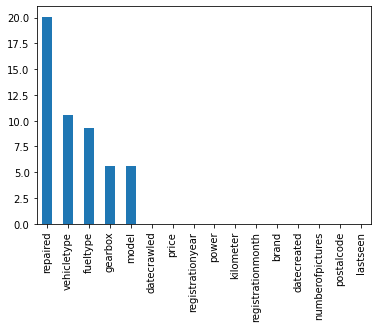

In [7]:
(df.isna().sum().sort_values(ascending=False) / df.shape[0] * 100).plot(kind='bar')

**Объем пропущенных значений составляют:**

* 20% в столбце Repaired. Скорее всего владельцы пропустили это значения потому что авто прежде не ремонтировалось. Либо просто скрыли информацию, чтобы автомобиль не казался менее привлекательным к покупке
* 10% в столбце VehicleType
* 9% в столбце FuelType
* 5% в столбце GearBox
* 5% в столбце Model

Остальные столбцы имеют пропуски возможно по причине проблем с выгрузкой данных, так как на эти вопросы может ответить только владельцы автомобилей. Заполним пропуски модами с помощью группировки по другим признакам объектов.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b>
    
<b>✅«Отлично»:</b> Да пропусков много, просто удалить их мы не можем. 

In [8]:
df['repaired'] = df['repaired'].fillna('no')

In [9]:
def fill_with_mode(column, column1, column2):
    df[column] = df.groupby([column1, column2])[column].transform(lambda x: x.fillna((x.mode()[0] if not x.mode().empty else "Empty")))

In [10]:
fill_with_mode('model', 'brand', 'registrationyear')
fill_with_mode('fueltype', 'brand', 'model')
fill_with_mode('vehicletype', 'brand', 'model')
fill_with_mode('gearbox', 'brand', 'model')

In [11]:
filled_columns = ['model', 'gearbox', 'brand', 'vehicletype', 'fueltype']
def count_empty_category(column):
    print(column, ' : ' ,df[column][df[column] == 'Empty'].count())

In [12]:
for column in filled_columns:
    count_empty_category(column)

model  :  3442
gearbox  :  21
brand  :  0
vehicletype  :  25
fueltype  :  14


3442 объекта продажи с неизвестными моделями авто. Предлагаю их переименовать в Other. Остальные показатели малы.

In [13]:
df['model'] = df['model'].replace('Empty', 'other')

In [14]:
def make_plotbar(index, title):
    pivot = pd.DataFrame(df.pivot_table(index=index, aggfunc="size").sort_values(ascending=False)).head(10)
    pivot.columns = ['count']
    plt.figure(figsize=(12,6))
    plt.title(title)
    sns.barplot(x='count', y=pivot.index, data=pivot)

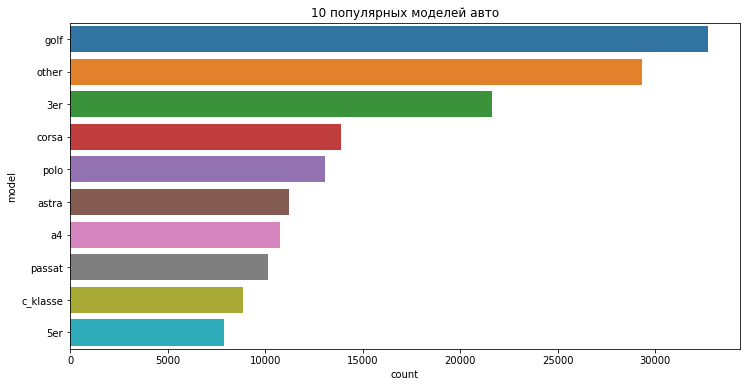

In [15]:
make_plotbar('model', '10 популярных моделей авто')

Самая популярная модель авто - golf

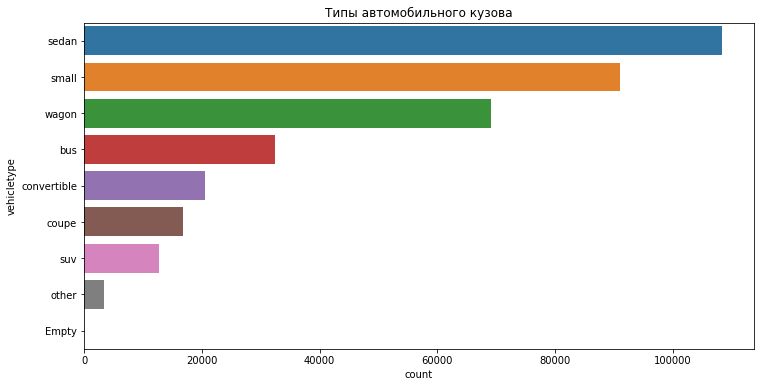

In [16]:
make_plotbar('vehicletype', 'Типы автомобильного кузова')

Самый популярный тип автомобильного кузова - седан

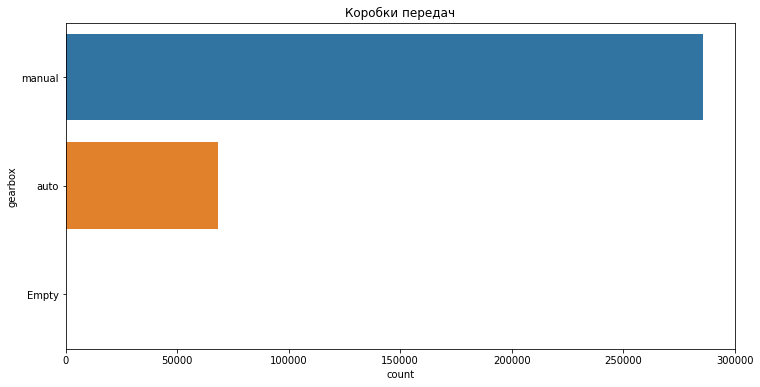

In [17]:
make_plotbar('gearbox', 'Коробки передач')

Автомобили с ручной коробкой передач превышают по количеству автомобили с автоматической коробкой передач

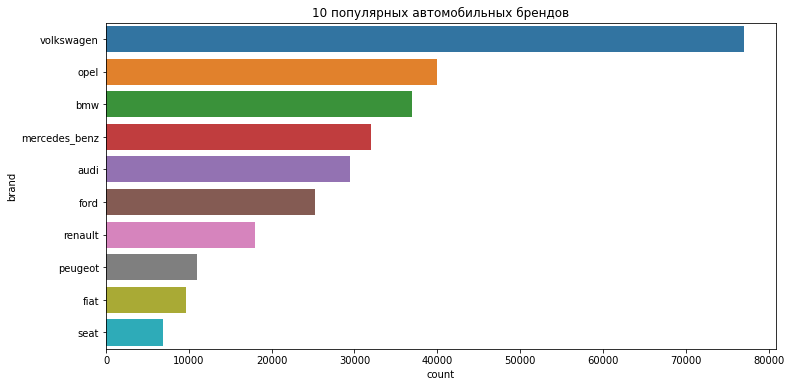

In [18]:

make_plotbar('brand', '10 популярных автомобильных брендов')

Volskwagen - самый продаваемый автомобиль

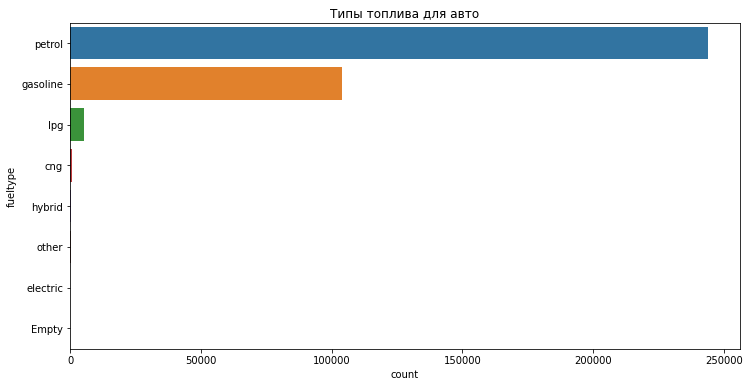

In [19]:
make_plotbar('fueltype', 'Типы топлива для авто')

Бензин - самое популярное топливо

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b>
    
<b>✅«Отлично»:</b> Отличная работа с пропусками 👍

### Количественные признаки

In [20]:
cars_for_free = df.query('price == 0')
cars_for_free.shape

(10772, 16)

10772 автомобиля отдаются бесплатно. На фоне остального датасета это немного строк. Предлагаю их просто убрать

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b>
    
<b>✅«Отлично»:</b> Совершенно верно. С таргетом лучше не экспериментировать.

In [21]:
df = df.query('price != 0')

In [22]:
perc = np.arange(0,1,0.05)

In [23]:
df['power'].describe(percentiles = perc)

count    343597.000000
mean        111.000192
std         188.177974
min           0.000000
0%            0.000000
5%            0.000000
10%           0.000000
15%          54.000000
20%          60.000000
25%          69.000000
30%          75.000000
35%          82.000000
40%          90.000000
45%         101.000000
50%         105.000000
55%         110.000000
60%         116.000000
65%         125.000000
70%         136.000000
75%         143.000000
80%         150.000000
85%         170.000000
90%         180.000000
95%         218.000000
max       20000.000000
Name: power, dtype: float64

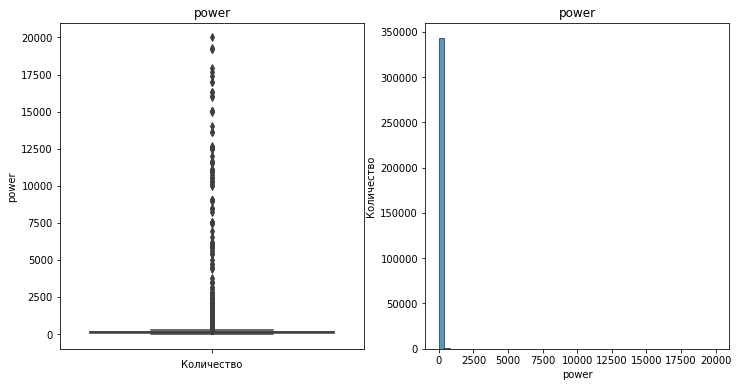

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].set_title('power')
sns.boxplot(y = 'power', data=df, ax = axes[0])
axes[0].set_xlabel('Количество')
     
axes[1].set_title('power')
sns.histplot(df['power'], kde=False, bins=50, ax = axes[1])
axes[1].set_ylabel('Количество')
            
plt.show()

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b>
    
<b>✅«Отлично»:</b> Хорошие графики. Обрати внимание на предупреждение. Чобы его убрать нужно заменить distplot на histplot

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Исправил.
</div>  

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v2:</b>

<b>✅«Отлично»:</b> 👍

Много выбросов, от этого график становится неинформативным

Text(0, 0.5, 'Количество')

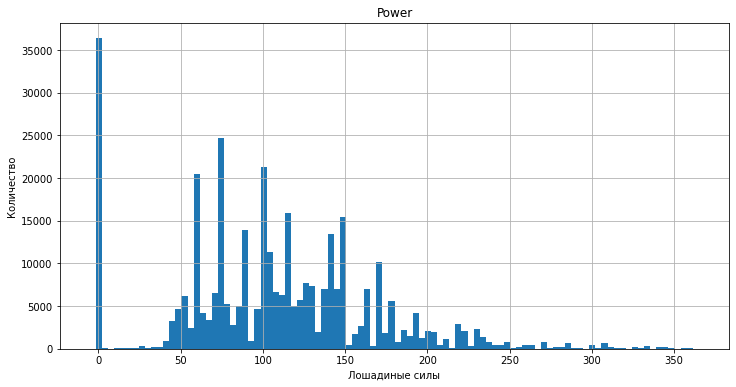

In [25]:
Q1 = df['power'].quantile(0.25)
Q3 = df['power'].quantile(0.75)
IQR = Q3 - Q1
fig, ax = plt.subplots()
ax.set_title('Power')
df['power'].plot(kind = 'hist', bins = 100, grid = True, range = (Q1 - IQR, Q3 + 3*IQR), figsize = (12, 6))
ax.set_xlabel('Лошадиные силы')
ax.set_ylabel('Количество')

<div class="alert alert-warning" role="alert">
<b>Комментарий ревьюера:</b>
    
<b>⚠️«Можно лучше»: </b> Не хвататет названия графика

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Исправил.
</div>  

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v2:</b>

<b>✅«Отлично»:</b> Было бы лучше назвать как-то так: "Распределение автомобилей по мощности"

Мы взяли квантили от показателей столбца для графика, и судя по нему в основном встречаются авто с мощностью до 350 лс. Примем 350 лс как максимум диапазона, а нули заменим на медианы относительно групп моделей объектов

In [26]:
df = df.query('power <= 350')

In [27]:
medians  = df.groupby('model')['power'].median().to_dict()
def fill_with_median (row):
    if row['power'] == 0:
        return medians [row['model']]
    return row ['power']
df['power'] = df.apply(lambda row: fill_with_median(row), axis = 1)

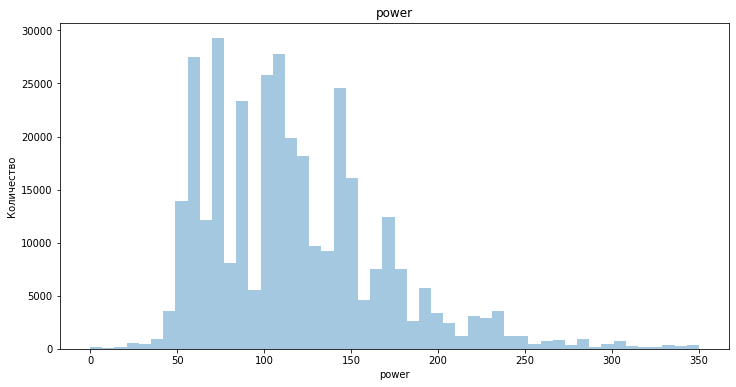

In [28]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('power')
sns.distplot(df['power'], kde=False, bins=50, ax = ax)
ax.set_ylabel('Количество')          
plt.show()

Убрали выбросы и нули из столбца Power

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b>
    
<b>✅«Отлично»:</b> Оличная работа с признаком Power

In [29]:
df['registrationyear'].describe(percentiles=perc)

count    342441.000000
mean       2004.074962
std          77.973936
min        1000.000000
0%         1000.000000
5%         1993.000000
10%        1996.000000
15%        1997.000000
20%        1998.000000
25%        1999.000000
30%        2000.000000
35%        2000.000000
40%        2001.000000
45%        2002.000000
50%        2003.000000
55%        2004.000000
60%        2005.000000
65%        2006.000000
70%        2007.000000
75%        2008.000000
80%        2009.000000
85%        2010.000000
90%        2012.000000
95%        2016.000000
max        9999.000000
Name: registrationyear, dtype: float64

In [30]:
def graphic_maker(column, name, ylim):
    plt.figure(figsize=(13,10), dpi= 80)
    sns.distplot(df[column], color="g", label= name, hist_kws={'alpha':.7})

    plt.figure(figsize=(8,10), dpi= 80)
    sns.boxplot(y=column, data=df)
    plt.title(name, fontsize=22)
    plt.ylim(ylim)
    
    plt.show()

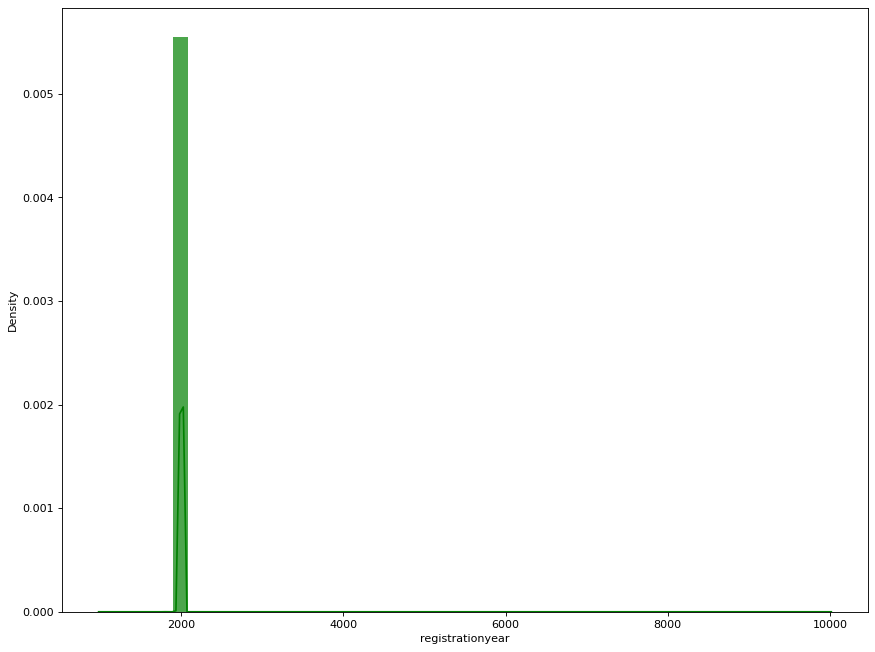

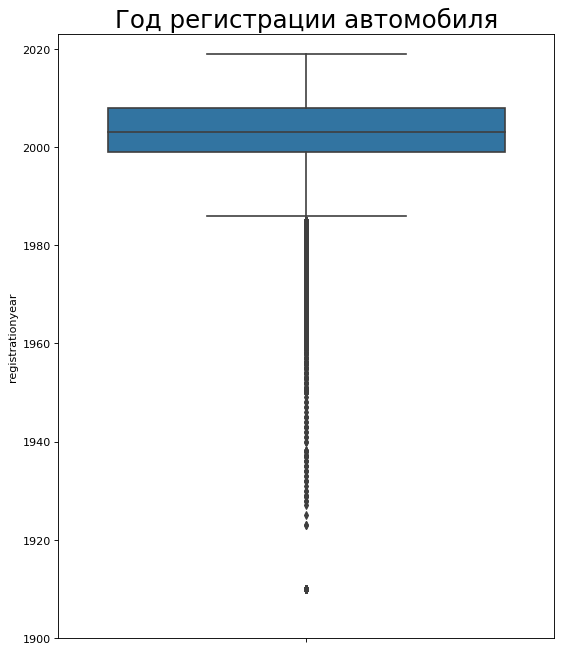

In [31]:
graphic_maker('registrationyear', 'Год регистрации автомобиля', [1900, 2023])

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> При более тщательном анализе были выявлены очень возрастные автомобили, но их объём достаточно необльшой от общей выборки. Так что мы можем их убрать 
</div>  

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера v2:</b>

<b>⛔️«Надо исправить»:</b> Максимальное значение в DateCrawled и/или DateCreated апрель 2016, следовательно год регистрации не может быть позже данной даты
</div>


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Исправил.
</div>  

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v3:</b>

<b>✅«Отлично»:</b> 👍

In [32]:
df = df.query('registrationyear >= 1992 and registrationyear < 2016')

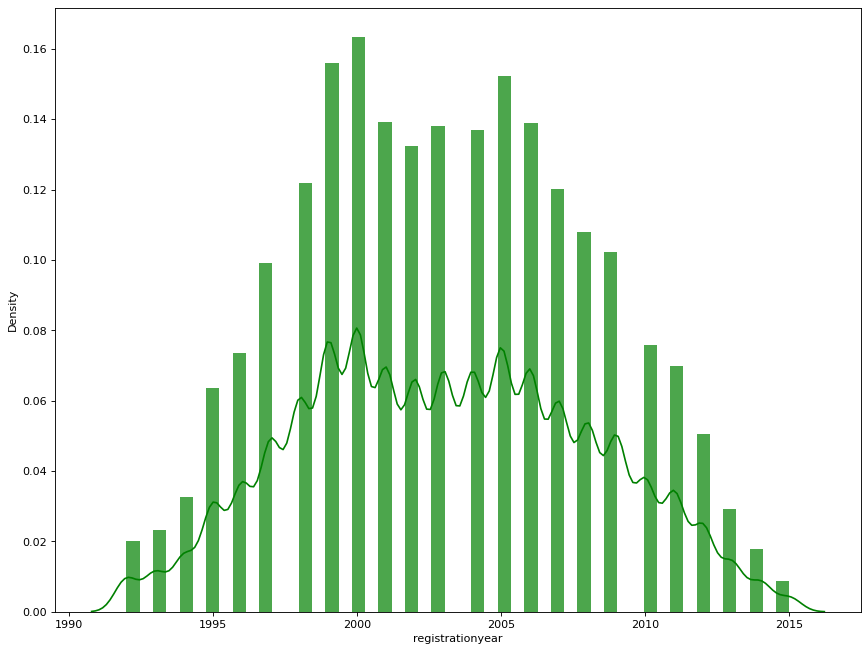

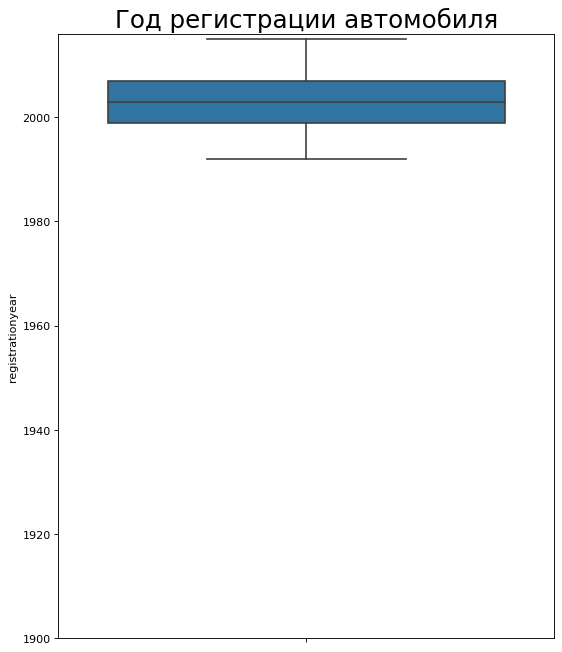

In [33]:
graphic_maker('registrationyear', 'Год регистрации автомобиля', [1900, 2016])

In [34]:
df = df.drop_duplicates().reset_index(drop=True)

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b>
    
<b>✅«Отлично»:</b> Молодец, что убрал дубликаты и сделал это в конце EDA.

Убрали дубликаты

In [35]:
def make_price_plot(feature, title):
    mean_price = df[[feature, 'price']].groupby(feature, as_index=False).mean().astype('int')
    plt.figure(figsize=(12,6))
    plt.grid(axis = 'both')
    sns.lineplot(x=feature, y='price', data=mean_price)
    plt.xlabel(feature, size=12)
    plt.ylabel('Средняя цена в евро', size=12)
    plt.title(title, size=15, y=1.02)
    plt.show()

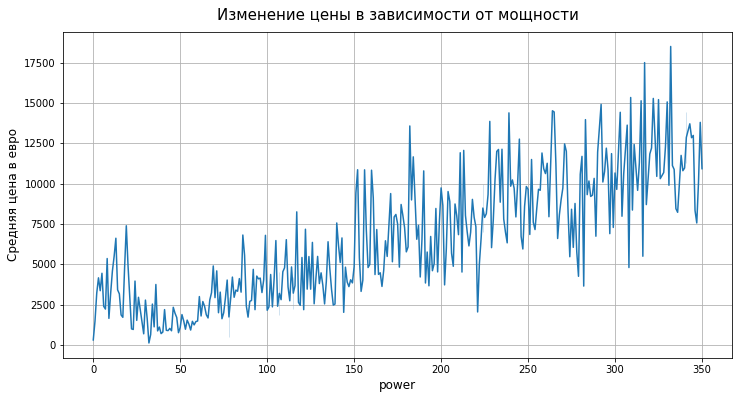

In [36]:
make_price_plot('power', 'Изменение цены в зависимости от мощности')

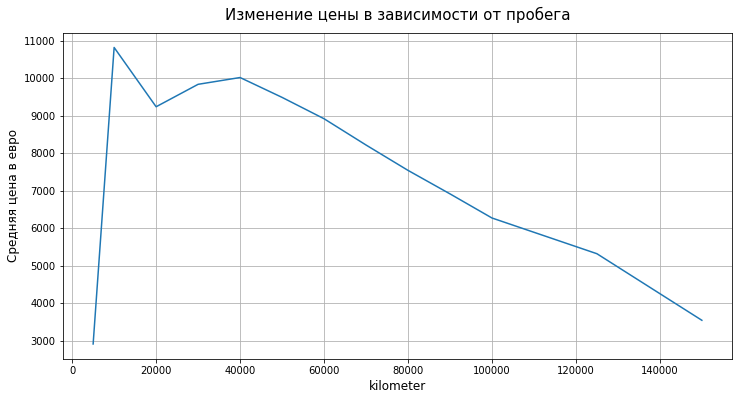

In [37]:
make_price_plot('kilometer', 'Изменение цены в зависимости от пробега')

In [38]:
df.shape

(305829, 16)

После анализа и обработки мы потеряли 1\10 данных. Надеюсь это не сильно повлияет на дальнейшую работу

<div class="alert alert-warning" role="alert">
<b>Комментарий ревьюера:</b>
    
<b>⚠️«Можно лучше»: </b> Очень хороший EDA. Давай офрмим красивый промежуточный вывод указав основные этапы. 10% - это хороший результат.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v2:</b>

<b>✅«Отлично»:</b> 👍

#### Вывод

Данные предоставлено небрежно, отсутствует много важной информации, присутствует как много пропусков, так и не всегда адекватные значения вбиты в требуемые поля. Необходимо обсудить с разработчиками и менеджерами эти моменты при заполнении, чтоб в будущем можно было доучить модель уже по более адекватным данным

В целом между данными есть дисбаланс, но он естественный, а не из-за выборки

## Обучение моделей

Features:

* Object: 'vehicletype', 'registrationyear', 'gearbox', 'model', 'fueltype', 'brand', 'notrepaired'
* Int: 'power', 'kilometer'

Target: 'price'

Уберем ненужные столбцы

In [39]:
df = df.drop(['datecrawled', 'datecreated', 'numberofpictures', 'postalcode', 'lastseen'], axis=1)

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера:</b>
    
<b>⛔️«Надо исправить»:</b> Не хватает анализа удаляемых признаков и пояснения почему мы так поступаем. 
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b>    
Данные столбцы можно удалить, т.к. они не влияют на целевой признак

* datecrawled - дата скачивания анкеты, у нас есть год регистрации
* registrationmonth - у нас есть год
* datecreated - дата создания анкеты, не очень информативный признак для цены, избавимся
* numberofpictures - для цены не нужный признак, а вот для увеличения просмотров анкеты было бы интереснее
* postalcode - вряд ли мы будем просить модель отправить письмо по этому индексу, удаляем
* lastseen - не влияет на целевой признак
</div>  

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v2:</b>

<b>✅«Отлично»:</b> Во многом с тобой согласен, но из postalcode можно достать регионы и сделать его категориальным признаком, от этого будет толк, ведь , например  в Мск и скаэем Челябинске машины стоят по разному. 

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера:</b>
    
<b>⛔️«Надо исправить»:</b> Кодирование и масштабирование признаков необходимо выполнять после разделение на выборки, причем обучение проводим на выборке train, а transform на всех выборках. исключение get_dummies, но он не очень подходит для ML
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Кодирование категориальных данных в Python происходит до разделения выборки на обучающую и тестовую. Это связано с тем, что при разделении выборки на обучающую и тестовую данные должны быть одинаково закодированы, чтобы модель могла корректно обучаться и предсказывать значения на новых данных. Если кодирование будет происходить после разделения выборки, то могут возникнуть проблемы с несоответствием кодирования между обучающей и тестовой выборками.
</div>  

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера v2:</b>
    
<b>⛔️«Надо исправить»:</b> А как по твоему модель будет работать в продакшне с каждой новой заявкой придется ее переобучать?
    
<a href='https://colab.research.google.com/drive/1_gAMXcQKoCShB_l8FNtYEejMnosm9mvt?usp=sharing'>Блокнот с  примером</a>
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Исправил.
</div>  

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v3:</b>

<b>✅«Отлично»:</b> 👍

In [40]:
features = df.drop('price', axis=1)
target = df['price']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=RND)
X_train_valid, X_test_valid, y_train_valid, y_test_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=RND) 

In [42]:
X_train_en = copy.deepcopy(X_train)
X_test_en = copy.deepcopy(X_test)
y_train_en = copy.deepcopy(y_train)
y_test_en = copy.deepcopy(y_test)
X_train_valid_en = copy.deepcopy(X_train_valid)
X_test_valid_en = copy.deepcopy(X_test_valid)
y_train_valid_en = copy.deepcopy(y_train_valid)
y_test_valid_en = copy.deepcopy(y_test_valid)

Поделили данные на обучающую, тестовую и валидационную выборки

Проведём кодирование категориальных данных с помощью Label Encoder

In [43]:
cats_cols = ['vehicletype', 'gearbox', 'model', 'fueltype', 'brand', 'repaired']

encoder  = TargetEncoder() 
X_train[cats_cols] = encoder.fit_transform(X_train[cats_cols],y_train)
X_test[cats_cols] = encoder.transform(X_test[cats_cols])
X_train_valid[cats_cols] = encoder.transform(X_train_valid[cats_cols])
X_test_valid[cats_cols] = encoder.transform(X_test_valid[cats_cols])

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера v3:</b>
    
<b>⛔️«Надо исправить»:</b> Обучаешь кодировщик на тестовой выборке. Fit делаешь один раз на выборке train
    
    X_test[feature] = label_encoders[feature].fit_transform(X_test[feature])
    X_train_valid[feature] = label_encoders[feature].fit_transform(X_train_valid[feature])
    X_test_valid[feature] = label_encoders[feature].fit_transform(X_test_valid[feature])

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> При изменении параметров в LableEncoder с обучением только на тестовой выборке, стоклнулся с проблемой. При трансформации выборок X_test, X_train_valid, X_test_valid стала появляться ошибка о неизвестных новых значениях, которые не входили в тренировочную выборку. Не получилось обойти эту проблему. Так же попробовал использовать метод OneHotEncoder(), но при его выполнении зависало ядро. Поэтому использовал метод кодирования TargetEncoder()  
</div>  

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v4:</b>

<b>✅«Отлично»:</b> Сейчас все сделано верно. Да к сожалению, LE по умолчанию не умеют обрабатывать неизвестные категории, это можно обойти через костыли, если интересно можешь загуглить есть масса способов

<div class="alert alert-warning" role="alert">
<b>Комментарий ревьюера:</b>
    
<b>⚠️«Можно лучше»: </b> Оптимальные соотношения при делении датасета на выборки:
* Если делим на 3 выборки, то 3:1:1
* Если на 2, то 75:25

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Исправил.
</div>  

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v2:</b>

<b>✅«Отлично»:</b> Соотношения выборок оптимальны

In [44]:
def scale_to_standard(train, test, valid):
    scaler = StandardScaler()
    quanti_columns = ['registrationyear', 'power', 'kilometer']
    scaler.fit(train[quanti_columns])
    train.loc[:, quanti_columns] = scaler.transform(train[quanti_columns])
    valid.loc[:, quanti_columns] = scaler.transform(valid[quanti_columns])
    test.loc[:, quanti_columns] = scaler.transform(test[quanti_columns])

In [45]:
scale_to_standard(X_train, X_test, X_train_valid)

<div class="alert alert-warning" role="alert">
<b>Комментарий ревьюера:</b>
    
<b>⚠️«Можно лучше»: </b> Масштабирование выполнено верно. Для выборки train можно сразу делать fit_transform.
    
Обрати внимание на предупреждение оно возникает из-за того что мы изменяем уже имеющиеся данные. Чтобы его убрать необходимо сохранять данные под другим именем или использовать loc.

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Исправил.
</div>  

Стандартизировали их

### LGB Regressor

In [46]:
def lgb_regr(features, target):
    model = LGBMRegressor()
    params = {
        'boosting_type' : ['gbdt'],
        'n_estimators' : [50, 100],
        'max_depth' : [5, 7, 10],
        'verbose' : [3],
        'random_state' : [RND],
        'force_col_wise': [True],
        'num_leaves' : [130]}
    grid_cv = GridSearchCV(estimator=model, param_grid=params, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', error_score='raise')
    grid_cv.fit(features, target, categorical_feature=cats_cols)
    print('Best hyperparams: ', grid_cv.best_params_)
    print('RMSE score on train sample: {:.2f}'.format((-grid_cv.best_score_) ** 0.5))
    return grid_cv.best_params_

In [47]:
%%time
lgb_params = lgb_regr(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Info] Total Bins 576
[LightGBM] [Info] Number of data points in the train set: 163108, number of used features: 10
[LightGBM] [Info] Start training from score 4681.494433
[LightGBM] [Debug] Trained a tree with leaves = 32 and depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 32 and depth =

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Info] Total Bins 579
[LightGBM] [Info] Number of data points in the train set: 163109, number of used features: 10
[LightGBM] [Info] Start training from score 4671.266644
[LightGBM] [Debug] Trained a tree with leaves = 32 and depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 32 and depth =

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Info] Total Bins 578
[LightGBM] [Info] Number of data points in the train set: 163109, number of used features: 10
[LightGBM] [Info] Start training from score 4664.054571
[LightGBM] [Debug] Trained a tree with leaves = 32 and depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 32 and depth =

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Info] Total Bins 576
[LightGBM] [Info] Number of data points in the train set: 163108, number of used features: 10
[LightGBM] [Info] Start training from score 4681.494433
[LightGBM] [Debug] Trained a tree with leaves = 32 and depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 32 and depth =

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Info] Total Bins 579
[LightGBM] [Info] Number of data points in the train set: 163109, number of used features: 10
[LightGBM] [Info] Start training from score 4671.266644
[LightGBM] [Debug] Trained a tree with leaves = 32 and depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 32 and depth =

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Info] Total Bins 578
[LightGBM] [Info] Number of data points in the train set: 163109, number of used features: 10
[LightGBM] [Info] Start training from score 4664.054571
[LightGBM] [Debug] Trained a tree with leaves = 32 and depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 32 and depth =

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Info] Total Bins 576
[LightGBM] [Info] Number of data points in the train set: 163108, number of used features: 10
[LightGBM] [Info] Start training from score 4681.494433
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 126 

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Info] Total Bins 579
[LightGBM] [Info] Number of data points in the train set: 163109, number of used features: 10
[LightGBM] [Info] Start training from score 4671.266644
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 122 

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Info] Total Bins 578
[LightGBM] [Info] Number of data points in the train set: 163109, number of used features: 10
[LightGBM] [Info] Start training from score 4664.054571
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 124 

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Info] Total Bins 576
[LightGBM] [Info] Number of data points in the train set: 163108, number of used features: 10
[LightGBM] [Info] Start training from score 4681.494433
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 126 

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Info] Total Bins 579
[LightGBM] [Info] Number of data points in the train set: 163109, number of used features: 10
[LightGBM] [Info] Start training from score 4671.266644
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 122 

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Info] Total Bins 578
[LightGBM] [Info] Number of data points in the train set: 163109, number of used features: 10
[LightGBM] [Info] Start training from score 4664.054571
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 124 

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Info] Total Bins 576
[LightGBM] [Info] Number of data points in the train set: 163108, number of used features: 10
[LightGBM] [Info] Start training from score 4681.494433
[LightGBM] [Debug] Trained a tree with leaves = 130 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 130 and dept

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Info] Total Bins 579
[LightGBM] [Info] Number of data points in the train set: 163109, number of used features: 10
[LightGBM] [Info] Start training from score 4671.266644
[LightGBM] [Debug] Trained a tree with leaves = 130 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 130 and dept

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Info] Total Bins 578
[LightGBM] [Info] Number of data points in the train set: 163109, number of used features: 10
[LightGBM] [Info] Start training from score 4664.054571
[LightGBM] [Debug] Trained a tree with leaves = 130 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 130 and dept

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Info] Total Bins 576
[LightGBM] [Info] Number of data points in the train set: 163108, number of used features: 10
[LightGBM] [Info] Start training from score 4681.494433
[LightGBM] [Debug] Trained a tree with leaves = 130 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 130 and dept

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Info] Total Bins 579
[LightGBM] [Info] Number of data points in the train set: 163109, number of used features: 10
[LightGBM] [Info] Start training from score 4671.266644
[LightGBM] [Debug] Trained a tree with leaves = 130 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 130 and dept

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Info] Total Bins 578
[LightGBM] [Info] Number of data points in the train set: 163109, number of used features: 10
[LightGBM] [Info] Start training from score 4664.054571
[LightGBM] [Debug] Trained a tree with leaves = 130 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 130 and dept

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Info] Total Bins 579
[LightGBM] [Info] Number of data points in the train set: 244663, number of used features: 10
[LightGBM] [Info] Start training from score 4672.271864
[LightGBM] [Debug] Trained a tree with leaves = 130 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 130 and dept

<div class="alert alert-warning" role="alert">
<b>Комментарий ревьюера:</b>
    
<b>⚠️«Можно лучше»: </b> 
* Гиперпараметры LGBM подобраны, но они не оптимальны, обрати внимание лучшие параметры являются крайними в твоих диапазонах данных, рекомендую увеличить диапазоны.
Также очень странное значение 'num_leaves': 127 почему именно 127? Рекомендую попробовать другие.
* Чтобы не выводить все строки с итерациями обучения можно изменить параметр verbose
* Молодец, что применяешь встроенный кодировщик LGBM, но обрати внимание на предупреждение, он тут не отрабатывает, так как ему необходимо, чтобы категориальные данные имели тип данных category и для lGBM и Catboost их не надо предварительно кодировать.

In [48]:
start_time = time.time()
model_lgb = LGBMRegressor(**lgb_params)
model_lgb.fit(X_train, y_train, verbose=10, eval_metric='rmse')
predict_lgb = model_lgb.predict(X_train_valid)
print('Test RMSE = {:.2f}'.format(mse(y_train_valid, predict_lgb)**0.5))
end_time = time.time()
print('Time elapsed:', end_time - start_time)

/opt/conda/lib/python3.9/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 583
[LightGBM] [Info] Number of data points in the train set: 244663, number of used features: 10
[LightGBM] [Info] Start training from score 4672.271864
[LightGBM] [Debug] Trained a tree with leaves = 130 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 130 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 130 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 130 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 130 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 130 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 130 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 130 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 130 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 130 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 130 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 130 and depth = 10
[LightGBM] [D

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера:</b>
    
<b>⛔️«Надо исправить»:</b> 
    
* Выборка test предназначена только для проведенеия тестирования одной лучшей модели. Она как бы имитирует запуск модели в продакшн.
    
*  Не всегда удобно изменять время при помощи %%time, так как он измеряет время выполнения всей ячейки, т.е. и fit и predict. В таком случае можно замерять время до и после строчки с нужной операцией при помощи функции time.time() (возвращает текущее время) и посчитать разницу.
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Исправил.
</div>  

Использовав модель LGBMRegressor мы получили показатели:

на обучающей выборке: 1488.77

на валидационной выборке: 1663.39

### CatBoostRegressor

In [49]:
def catboost_regr(features, target):
    model = CatBoostRegressor()
    params = {
            'n_estimators' : [50, 100],
            'verbose' : [0],
            'random_state' : [RND],
            'max_depth' : [5, 7, 10]
    }
    grid_cv = GridSearchCV(estimator=model, 
    param_grid=params, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', error_score='raise')
    grid_cv.fit(features, target, cat_features=cats_cols, verbose=10)
    print('Best hyperparams: ', grid_cv.best_params_)
    print('RMSE score on train sample: {:.2f}'.format((-grid_cv.best_score_) ** 0.5))
    return grid_cv.best_params_

In [50]:
%%time
catb_params = catboost_regr(X_train_en, y_train_en) 

Learning rate set to 0.5
0:	learn: 3143.4424663	total: 101ms	remaining: 4.97s
10:	learn: 1830.6423200	total: 558ms	remaining: 1.98s
20:	learn: 1735.8290089	total: 946ms	remaining: 1.31s
30:	learn: 1696.2867894	total: 1.32s	remaining: 812ms
40:	learn: 1668.6708926	total: 1.7s	remaining: 373ms
49:	learn: 1648.2276956	total: 2.04s	remaining: 0us
Learning rate set to 0.5
0:	learn: 3162.2830228	total: 48ms	remaining: 2.35s
10:	learn: 1845.2662632	total: 461ms	remaining: 1.63s
20:	learn: 1748.3130838	total: 867ms	remaining: 1.2s
30:	learn: 1694.7147984	total: 1.28s	remaining: 783ms
40:	learn: 1666.8849819	total: 1.65s	remaining: 363ms
49:	learn: 1647.9526607	total: 2s	remaining: 0us
Learning rate set to 0.5
0:	learn: 3155.0192497	total: 44.9ms	remaining: 2.2s
10:	learn: 1830.8843527	total: 464ms	remaining: 1.64s
20:	learn: 1744.9866859	total: 854ms	remaining: 1.18s
30:	learn: 1696.6587339	total: 1.27s	remaining: 780ms
40:	learn: 1664.5736206	total: 1.67s	remaining: 366ms
49:	learn: 1644.0888

<div class="alert alert-warning" role="alert">
<b>Комментарий ревьюера:</b>
    
<b>⚠️«Можно лучше»: </b> 
* По гиперпараметрам Catboost такие же рекомендации как и у LGBM. У Catboost по умолчанию 1000 итераций

In [51]:
encoder  = TargetEncoder() 
X_train_en[cats_cols] = encoder.fit_transform(X_train_en[cats_cols],y_train_en)
X_test_en[cats_cols] = encoder.transform(X_test_en[cats_cols])
X_train_valid_en[cats_cols] = encoder.transform(X_train_valid_en[cats_cols])
X_test_valid_en[cats_cols] = encoder.transform(X_test_valid_en[cats_cols])

In [52]:
start_time = time.time()
catb_model = CatBoostRegressor(**catb_params)
catb_model.fit(X_train_en, y_train_en, verbose=10)
catb_pred = catb_model.predict(X_train_valid_en)
print('Test RMSE : {:.2f} '.format(mse(y_train_valid_en, catb_pred)**0.5))
end_time = time.time()
print('Time elapsed:', end_time - start_time)

Learning rate set to 0.5
0:	learn: 2948.7218502	total: 56.5ms	remaining: 5.59s
10:	learn: 1628.9875103	total: 627ms	remaining: 5.07s
20:	learn: 1550.9734199	total: 1.18s	remaining: 4.44s
30:	learn: 1500.0755852	total: 1.73s	remaining: 3.85s
40:	learn: 1469.0058893	total: 2.27s	remaining: 3.26s
50:	learn: 1444.8397867	total: 2.81s	remaining: 2.7s
60:	learn: 1425.3428667	total: 3.35s	remaining: 2.14s
70:	learn: 1407.6199950	total: 3.91s	remaining: 1.6s
80:	learn: 1391.4487201	total: 4.46s	remaining: 1.05s
90:	learn: 1379.1716015	total: 5s	remaining: 495ms
99:	learn: 1364.6318026	total: 5.49s	remaining: 0us
Test RMSE : 1489.00 
Time elapsed: 6.295198202133179


<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера v2:</b>

<b>⛔️«Надо исправить»:</b> Не всегда удобно изменять время при помощи %%time, так как он измеряет время выполнения всей ячейки, т.е. и fit и predict. В таком случае можно замерять время до и после строчки с нужной операцией при помощи функции time.time() (возвращает текущее время) и посчитать разницу.
</div>

Использовав модель CatBoostRegressor мы получили показатели:

на обучающей выборке: 1519.61

на валидационной выборке: 1675.31 

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера:</b>
    
<b>⛔️«Надо исправить»:</b> 
    
В задании просят: "Обучите разные модели, одна из которых — LightGBM, как минимум одна — не бустинг. Для каждой модели попробуйте разные гиперпараметры" у тебя 3 бустинга.
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Добавил модель DummyRegressor
</div>  

<div class="alert alert-warning" role="alert">
<b>Комментарий ревьюера v2:</b>
    
<b>⚠️«Можно лучше»: </b> 
Лучше попробовать линейную модель или DR / RFR

### DummyRegressor

In [53]:
models_scors = pd.DataFrame(columns = ['model', 'rmse', 'lirning_time', 'predicting_time'])

In [54]:
dummy_model = DummyRegressor(strategy='median')

start_time = time.time()
dummy_model.fit(X_train, y_train)
lirning_time = time.time() - start_time
start_time = time.time()
prediction = dummy_model.predict(X_test_valid)
predicting_time = time.time() - start_time
scor = mean_squared_error(y_test_valid, prediction)
print(f' rmse: {scor ** 0.5}')
end_time = time.time()
print('Time elapsed:', end_time - start_time)
print('lirning_time:', lirning_time)

 rmse: 4818.7917018156495
Time elapsed: 0.0009331703186035156
lirning_time: 0.002827167510986328


In [55]:
dummy_model = DummyRegressor(strategy='median')

start_time = time.time()
dummy_model.fit(X_train, y_train)
lirning_time = time.time() - start_time
start_time = time.time()
prediction = dummy_model.predict(X_test)
predicting_time = time.time() - start_time
scor = mean_squared_error(y_test, prediction)
print(f' rmse: {scor ** 0.5}')
end_time = time.time()
print('Time elapsed:', end_time - start_time)
print('lirning_time:', lirning_time)

 rmse: 4855.794458597961
Time elapsed: 0.0009918212890625
lirning_time: 0.0026803016662597656


## Анализ моделей

Мы провели анализ и обработку данных. Подготовили их и обучили модели на их основе. Нашли лучшие гиперпараметры для моделей и протестировали их на валидационных выборках, применив метрику RMSE.

In [58]:
results = {
    'Model' : ['LGBMRegressor', 'CatBoostRegressor', 'DummyRegressor'],
    'Train RMSE' :pd.Series([1491.33, 1531.70, 4892.51]),
    'Train Time, sec': pd.Series([211, 144, 0.0033]),
    'Test RMSE' :pd.Series([1493.75, 1489.00, 4855.79]),
    'Test Time, sec': pd.Series([15.41, 10.4, 0.0034])
    }
display(pd.DataFrame(results))

,Model,Train RMSE,"Train Time, sec",Test RMSE,"Test Time, sec"
0,LGBMRegressor,1491.33,211.0000,1493.75,15.4100
1,CatBoostRegressor,1531.70,144.0000,1489.00,10.4000
2,DummyRegressor,4892.51,0.0033,4855.79,0.0034


Прогоним тестовые данные через CatBoostRegressor, т.к. по качеству она не уступает LGBMRegressor, но по времени обучения значительно превосходит.

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера v3:</b>
    
<b>⛔️«Надо исправить»:</b> Идея ,тестовой выборки - это имитация запуска модели в продакшн Мы же не можем запустить две модели. Для выбора лучшей моедли у нас есть выбрка valid, на ней мы принимаем решение и на тест идет только одна модель
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v4:</b>

<b>✅«Отлично»:</b> 👍

In [57]:
start_time = time.time()
catb_pred = catb_model.predict(X_test_en)
print('Test RMSE : {:.2f} '.format(mse(y_test_en, catb_pred)**0.5))
end_time = time.time()
print('Time elapsed:', end_time - start_time)

Test RMSE : 1497.56 
Time elapsed: 0.026253938674926758


### Вывод
Был проведен исследовательский анализ данных, изучены аномалии, заполнены пропуски, отброшены неинформативные столбцы.

Целью было построить модель, которая бы показала хорошие временные и метрические результаты. За основу были взяты модели LGBMRegressor, CatBoostRegressor и DummyRegressor.

DummyRegressor показала плохие результаты (RMSE больше 4800), поэтому на тестовой выборке ее не прогоняли.
Модели градиентного бустинга показали хорошие результаты(в том числе, требуемый порог в метрике 2500 прошли) на обучающей выборке, однако временные затраты очень большие, особенно у LGBMRegressor. 
На тестовой выборке прогонялись две модели градиентного бустинга. Наилучший результат, как количественный, так и временной, показала модель CatBoostRegressor. LGBMRegressor долго обучается и дольше делает предсказания, чем CatBoost.

Таким образом, цель и условия заказчика были выполнены. В рамках этого проекта наилучшей оказалась модель CatBoost.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v3:</b>

<b>✅«Отлично»:</b> Хороший вывод. Можно еще уточнить гиперпараметры лучшей модели и ее результат на тесте

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера:</b>
    
<b>⛔️«Надо исправить»:</b> 
    
Нам нужно выбрать лучшую модель на выборке valid. После провести тестирования лучшей модели на выборке test. После нужно написать общий вывод по работе где необходимо отразить самые важные моменты работы и ее результат (модель с параметрами)
</div>

<div class="alert alert-warning" role="alert">
<b>Комментарий ревьюера:</b>
    
<b>⚠️«Можно лучше»: </b> Еще можно проанализировать нашу лучшую модель. Например, вывести график или таблицу важности признаков  <a href="https://newtechaudit.ru/feature-importance-v-sklearn-i-catboost-na-primere-klassicheskih-datasetov/">Feature importances</a>. Также для интерпретации предсказаний моделей есть отличная библотека <a href="https://habr.com/ru/articles/428213/">SHAP</a>.
   
</div>

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера м2:</b>
    
<b>⛔️«Надо исправить»:</b> 
    
* Нет тестирования лучшей моедли.
    
* Нет общего вывода по работе, где необходимо отразить самые важные моменты работы и ее результат (модель с параметрами)
</div>

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту**

Спасибо за твой проект! У тебя хорошая работа!

**Положительные моменты проекта**: 
* Все пункты выполнены
* Шаги последовательные, есть комментарии шагов
* Проводится аналитика
* Подробный, качественный EDA
* Подбор гиперпараметров с помощью GridSearchCV
* Применение встроенных кодировщиков у LGBM и Catboost
* Требуемая метрика достигнута 
    
**Обязательные исправления отмечены красными комментариями, без них, к сожалению, не получится принять работу:**
* Поправить EDA
* Кодирование до разделения на выборки
* Не хватает второй модели (не бустинг)
* Применение тестовой выборки

**Желаю удачи и жду твой проект на повторное ревью!**😉

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнена загрузка и подготовка данных
- [x]  Выполнено обучение моделей
- [x]  Есть анализ скорости работы и качества моделей